<a href="https://colab.research.google.com/github/SerraTalas/MachineLearningProjects/blob/main/NaiveBayesAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/verikumesi2.csv')

In [ ]:
x= df.iloc[:, [1,30]].values
y= df.iloc[:, 30].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)

In [ ]:
# Etiket oranını hesapla
class_ratio = df['Class'].value_counts(normalize=True)

# Eğitim ve test veri setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, stratify=df['Class'], random_state=42)

# Eğitim ve test setlerindeki etiket oranlarını kontrol et
train_class_ratio = y_train.value_counts(normalize=True)
test_class_ratio = y_test.value_counts(normalize=True)

print("Eğitim seti etiket oranı:")
print(train_class_ratio)

print("\nTest seti etiket oranı:")
print(test_class_ratio)

Eğitim seti etiket oranı:
Class
0    0.913847
1    0.086153
Name: proportion, dtype: float64

Test seti etiket oranı:
Class
0    0.913701
1    0.086299
Name: proportion, dtype: float64


In [ ]:
total_train_samples = len(y_train)
total_test_samples = len(y_test)

train_0_count = (y_train == 0).sum()
train_1_count = (y_train == 1).sum()

test_0_count = (y_test == 0).sum()
test_1_count = (y_test == 1).sum()

train_0_percent = (train_0_count / total_train_samples) * 100
train_1_percent = (train_1_count / total_train_samples) * 100

test_0_percent = (test_0_count / total_test_samples) * 100
test_1_percent = (test_1_count / total_test_samples) * 100

print("Eğitim setindeki 0 etiketli veri sayısı:", train_0_count, " ve yüzdesi:", train_0_percent)
print("Eğitim setindeki 1 etiketli veri sayısı:", train_1_count, " ve yüzdesi:", train_1_percent)
print("Test setindeki 0 etiketli veri sayısı:", test_0_count, " ve yüzdesi:", test_0_percent)
print("Test setindeki 1 etiketli veri sayısı:", test_1_count, " ve yüzdesi:", test_1_percent)

Eğitim setindeki 0 etiketli veri sayısı: 4105  ve yüzdesi: 91.38468388245771
Eğitim setindeki 1 etiketli veri sayısı: 387  ve yüzdesi: 8.615316117542298
Test setindeki 0 etiketli veri sayısı: 1027  ve yüzdesi: 91.37010676156584
Test setindeki 1 etiketli veri sayısı: 97  ve yüzdesi: 8.629893238434164


In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Naive Bayes sınıflandırıcısını oluştur
model = GaussianNB()

# Modeli eğit
model.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak test seti üzerinde tahmin yap
y_pred = model.predict(X_test)
from sklearn.naive_bayes import GaussianNB

# Naive Bayes sınıflandırıcısını oluştur
model = GaussianNB()

# Modeli eğit
model.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak test seti üzerinde tahmin yap
y_pred = model.predict(X_test)


# Performans metriklerini hesapla
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçları raporla
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9572953736654805
Precision: 0.7058823529411765
Recall: 0.865979381443299
F1 Score: 0.7777777777777778


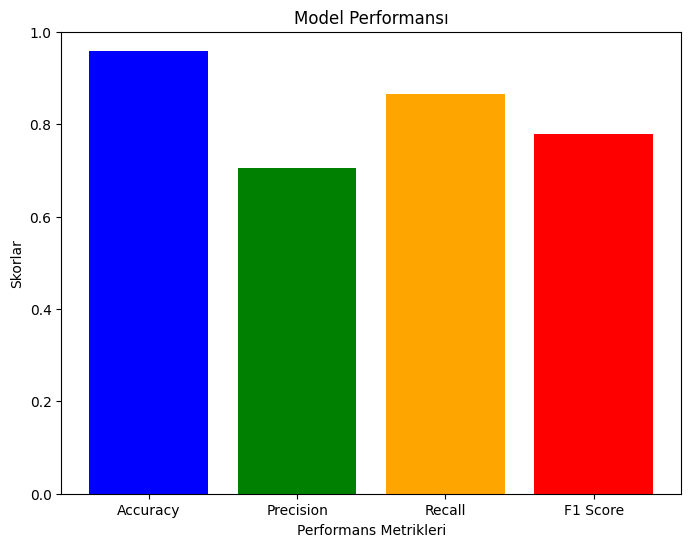

In [ ]:
import matplotlib.pyplot as plt

# Performans metriklerini saklayacak listeler oluştur
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Sonuçları çiz
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performansı')
plt.xlabel('Performans Metrikleri')
plt.ylabel('Skorlar')
plt.ylim(0, 1)  # Y ekseni sınırlarını ayarla
plt.show()

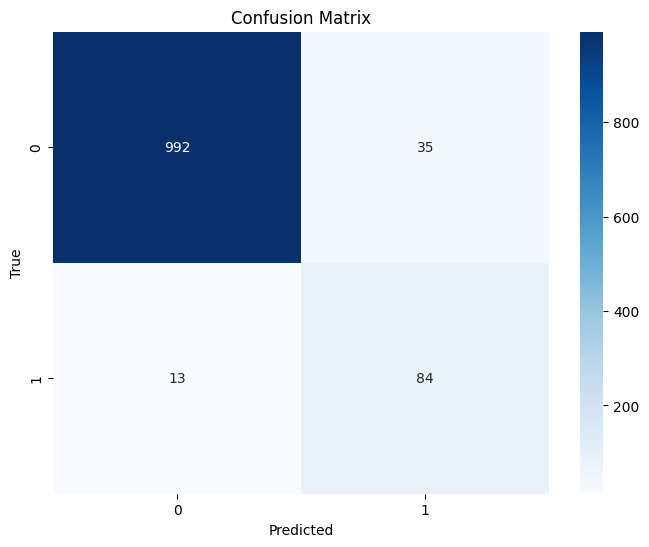

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix'i oluştur
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap ile confusion matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()